<a href="https://colab.research.google.com/github/shaileyj/CS175_project/blob/main/stock_and_tweet_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing

## Exploring Tweet Dataset

In [ ]:
!unzip stock_tweets.csv.zip

Archive:  stock_tweets.csv.zip
  inflating: stock_tweets.csv        


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('stock_tweets.csv')

In [ ]:
print(df.shape)
print(df.columns)

(80793, 4)
Index(['Date', 'Tweet', 'Stock Name', 'Company Name'], dtype='object')


In [ ]:
print(df['Stock Name'].value_counts())

Stock Name
TSLA    37422
TSM     11034
AAPL     5056
AMZN     4089
MSFT     4089
PG       4089
NIO      3021
META     2751
AMD      2227
NFLX     1727
GOOG     1291
PYPL      843
DIS       635
BA        399
COST      393
INTC      315
KO        310
CRM       233
XPEV      225
ENPH      216
ZS        193
VZ        123
BX         50
F          31
NOC        31
Name: count, dtype: int64


In [ ]:
#honestly I think there might not be enough tweets for everything under the top 10
to_drop = ["GOOG", "PYPL", "DIS", "BA", "COST", "INTC", "KO", "CRM", "XPEV", "ENPH", "ZS", "VZ", "BX", "F", "NOC"]
new_df = df.drop(df[df['Stock Name'].isin(to_drop)].index)
print(new_df.shape)

(75505, 4)


## Dealing with Dates

In [ ]:
from datetime import datetime
import pytz

In [ ]:
#Figuring out how to deal with the dates in this dataset
date = datetime.fromisoformat(df['Date'][0])
print(date)
print(date.hour)
print(date.day)
print(date.month)

2022-09-29 23:41:16+00:00
23
29
9


In [ ]:
stock_date_ex = '1998-01-02 16:00:00' #copied and pasted a date from the stock
                                      #dataset, we'll need to compare dates
                                      #from both sets (probably)
stock_date = datetime.fromisoformat(stock_date_ex)
print(stock_date)
print(stock_date.hour)
print(stock_date.day)
print(stock_date.month)

1998-01-02 16:00:00
16
2
1


In [ ]:
utc = pytz.UTC
print(date > utc.localize(stock_date))

True


## Sentiment Analysis

In [ ]:
from transformers import pipeline

# Load the classification pipeline with the specified model
pipe = pipeline("text-classification", model="tabularisai/multilingual-sentiment-analysis")

# Classify a new sentence
sentence = "I love this product! It's amazing and works perfectly."
result = pipe(sentence)

# Print the result
print(result[0]['label'])

Device set to use cpu


Very Positive


In [ ]:
sentiment_to_value = {"Very Negative": -2, "Negative": -1, "Neutral": 0, "Positive": 1, "Very Positive": 2}
sentiments = pd.Series()
for i in range(len(df)):
  sentiments[i] = sentiment_to_value[pipe(df['Tweet'][i])[0]['label']]
  if i%1000 == 0:
    print(i, "/80793")

0 /80793
1000 /80793
2000 /80793
3000 /80793
4000 /80793
5000 /80793
6000 /80793
7000 /80793
8000 /80793
9000 /80793
10000 /80793
11000 /80793
12000 /80793
13000 /80793
14000 /80793
15000 /80793
16000 /80793
17000 /80793
18000 /80793
19000 /80793
20000 /80793
21000 /80793
22000 /80793
23000 /80793
24000 /80793
25000 /80793
26000 /80793
27000 /80793
28000 /80793
29000 /80793
30000 /80793
31000 /80793
32000 /80793
33000 /80793
34000 /80793
35000 /80793
36000 /80793
37000 /80793
38000 /80793
39000 /80793
40000 /80793
41000 /80793
42000 /80793
43000 /80793
44000 /80793
45000 /80793
46000 /80793
47000 /80793
48000 /80793
49000 /80793
50000 /80793
51000 /80793
52000 /80793
53000 /80793
54000 /80793
55000 /80793
56000 /80793
57000 /80793
58000 /80793
59000 /80793
60000 /80793
61000 /80793
62000 /80793
63000 /80793
64000 /80793
65000 /80793
66000 /80793
67000 /80793
68000 /80793
69000 /80793
70000 /80793
71000 /80793
72000 /80793
73000 /80793
74000 /80793
75000 /80793
76000 /80793
77000 /80793

In [ ]:
df['Sentiment'] = sentiments
df.to_csv('stock_tweets_with_sentiment.csv')

In [ ]:
print(df['Sentiment'].value_counts())

Sentiment
 0    57632
-1     8239
 2     6597
 1     5274
-2     3051
Name: count, dtype: int64


Seems like there's a lot of "neutral" tweets

## Combining Stock + Sentiment Data

In [ ]:
import pandas as pd
from datetime import datetime

In [ ]:
!unzip AAPL.US_H1.csv.zip
aapl_df = pd.read_csv("AAPL.US_H1.csv")

Archive:  AAPL.US_H1.csv.zip
  inflating: AAPL.US_H1.csv          


In [ ]:
tweet_df = pd.read_csv("stock_tweets_with_sentiment.csv")

In [ ]:
print(aapl_df.shape)
print(aapl_df.columns)

(46751, 6)
Index(['datetime', 'open', 'high', 'low', 'close', 'volume'], dtype='object')


In [ ]:
tweet_date = datetime.fromisoformat(tweet_df["Date"][0])
print(tweet_date)
tweet_hour = datetime(tweet_date.year, tweet_date.month, tweet_date.day, tweet_date.hour)
print(tweet_hour)

sd ="2022-09-29 23:00:00"
stock_date_ex = datetime.fromisoformat(sd)
print(stock_date_ex)
print(tweet_hour == stock_date_ex)
print(tweet_hour.isoformat())

2022-09-29 23:41:16+00:00
2022-09-29 23:00:00
2022-09-29 23:00:00
True
2022-09-29T23:00:00


In [ ]:
def drop_rows_not_in_tweet_range(stock_df):
  not_in_tweet_range = []
  start = datetime(2021, 9, 29, 0)
  end = datetime(2022, 9, 29, 23)
  for i in range(len(stock_df)):
    date = datetime.fromisoformat(stock_df["datetime"][i])
    if date < start or date > end:
      not_in_tweet_range.append(i)
  result = stock_df.drop(not_in_tweet_range).reset_index(drop=True)
  return result

In [ ]:
def binary_search(arr, x):
    low = 0
    high = len(arr) - 1
    while low <= high:
        mid = low + (high - low) // 2
        date = datetime.fromisoformat(arr[mid])
        if date == x:
            return mid
        elif date < x:
            low = mid + 1
        else:
            high = mid - 1
    return -1

In [ ]:
def add_sentiment_to_stock_df(stock_df, tweet_df):
  sentiments = pd.Series(0, index=range(len(stock_df)))
  for i in range(len(tweet_df)):
    tweet_date = datetime.fromisoformat(tweet_df["Date"][i])
    tweet_hour = datetime(tweet_date.year, tweet_date.month, tweet_date.day, tweet_date.hour)
    index = binary_search(stock_df["datetime"], tweet_hour)
    if index != -1:
      sentiments[index] += tweet_df['Sentiment'][i]
  stock_df['sentiment'] = sentiments

In [ ]:
import time
stock_tickers = ['AAPL', 'AMD', 'AMZN', 'BA', 'COST', 'DIS', 'GOOG', 'META', 'MSFT', 'NFLX', 'PG', 'PYPL','TSLA']
stock_file_beginning = '/content/drive/MyDrive/CS175/stock_data/'
new_beginning = 's2_stock_data/'
stock_file_end = '.US_H1.csv'
for ticker in stock_tickers:
  #file_name = stock_file_beginning + ticker + stock_file_end + '.zip'
  #print(file_name)
  #!unzip $file_name -d $stock_file_beginning
  stock_df = pd.read_csv(stock_file_beginning + ticker + stock_file_end)
  stock_df = drop_rows_not_in_tweet_range(stock_df)
  add_sentiment_to_stock_df(stock_df, tweet_df)
  stock_df.to_csv(new_beginning + ticker + "_sentiment.csv", index=False)

In [ ]:
tsla_df = pd.read_csv("/content/s2_stock_data/TSLA_sentiment.csv")
print(tsla_df['sentiment'].value_counts())

sentiment
 0     307
-1     236
 1     227
 2     207
-2     170
 3     141
-3     103
 4      88
-4      81
 5      78
-5      57
 6      48
-6      41
 7      36
-7      28
 8      28
 9      16
 10     15
-9      10
-8      10
-10      7
 11      7
-12      6
 14      6
 12      5
 13      5
 16      4
-11      4
-17      3
 15      2
-24      2
-13      2
 20      2
 17      2
-15      2
-14      1
 18      1
 21      1
-21      1
-18      1
-46      1
-20      1
-67      1
 19      1
-42      1
 26      1
Name: count, dtype: int64


In [ ]:
tsla_df

,datetime,open,high,low,close,volume,sentiment
0,2021-09-29 16:00:00,259.93,263.51,259.70,262.83,5948430,0
1,2021-09-29 17:00:00,262.83,264.50,262.23,263.54,6937515,0
2,2021-09-29 18:00:00,263.58,263.62,259.60,260.72,6399114,0
3,2021-09-29 19:00:00,260.79,261.48,256.89,258.33,5889309,0
4,2021-09-29 20:00:00,258.34,259.58,257.15,258.35,3775977,0
...,...,...,...,...,...,...,...
1992,2022-09-29 19:00:00,272.96,273.09,268.91,269.30,6059690,4
1993,2022-09-29 20:00:00,269.32,269.35,266.57,266.86,6874062,-3
1994,2022-09-29 21:00:00,266.89,268.33,266.01,266.03,6041103,2
1995,2022-09-29 22:00:00,266.02,269.40,265.78,268.35,8610715,-17


## Risk-Free Rate Preprocessing

In [ ]:
import pandas as pd
from datetime import datetime

risk_free_rates = pd.read_csv("/content/drive/MyDrive/CS175/DTB3.csv")
not_in_tweet_range = []
start = datetime(2021, 9, 29)
end = datetime(2022, 9, 29)
for i in range(len(risk_free_rates)):
  date = datetime.fromisoformat(risk_free_rates["observation_date"][i])
  if date < start or date > end:
      not_in_tweet_range.append(i)
risk_free_rates = risk_free_rates.drop(not_in_tweet_range).reset_index(drop=True)
risk_free_rates = risk_free_rates.ffill() #fill empty rows with value in previous row
risk_free_rates.to_csv("/content/drive/MyDrive/CS175/risk_free_rates.csv", index=False)
risk_free_rates

,observation_date,DTB3
0,2021-09-29,0.04
1,2021-09-30,0.04
2,2021-10-01,0.04
3,2021-10-04,0.04
4,2021-10-05,0.04
...,...,...
257,2022-09-23,3.12
258,2022-09-26,3.30
259,2022-09-27,3.26
260,2022-09-28,3.29


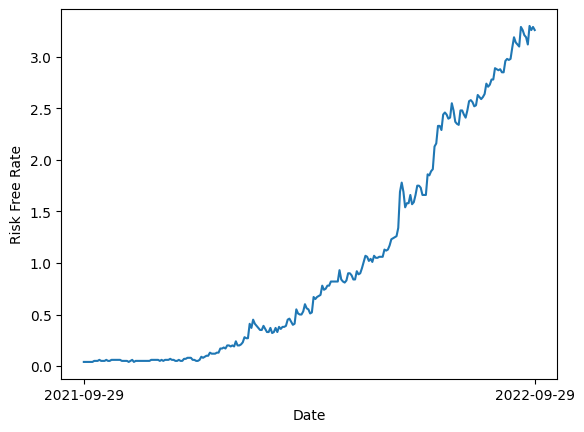

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
risk_free_rates = pd.read_csv("/content/drive/MyDrive/CS175/risk_free_rates.csv")
fig, ax = plt.subplots()
plt.plot(risk_free_rates['observation_date'], risk_free_rates['DTB3'])
plt.xlabel("Date")
plt.ylabel("Risk Free Rate")
ax.set_xticks(('2021-09-29', '2022-09-29'))
plt.show()

##Visualize Stock Data

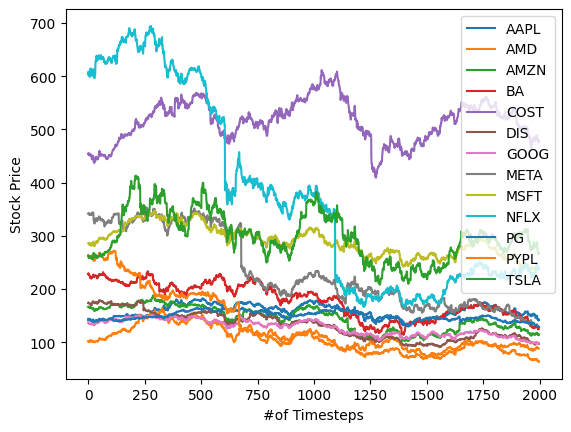

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure()
stock_tickers = ['AAPL', 'AMD', 'AMZN', 'BA', 'COST', 'DIS', 'GOOG', 'META', 'MSFT', 'NFLX', 'PG', 'PYPL','TSLA']
stock_file_beginning = '/content/drive/MyDrive/CS175/sentiment_stock_data/'
stock_file_end = '_sentiment.csv'
for ticker in stock_tickers:
  stock_data = pd.read_csv(stock_file_beginning + ticker + stock_file_end)
  plt.plot(stock_data['close'], label = ticker)
plt.legend()
plt.xlabel("#of Timesteps")
plt.ylabel("Stock Price")
plt.show()